In [22]:
import auto 
import matplotlib.pyplot as plt
import numpy as np
import tkinter as Tkinter
from scipy.integrate import solve_ivp

In [23]:
# setting up the initial conditions
t_year = 200
t_sec = t_year*365*24*60*60 
t_tot = (0, t_sec) 

T0 = 0 #initial temperature increase condition [K]

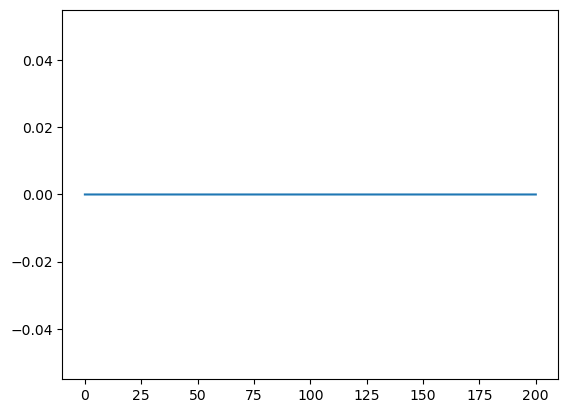

In [24]:
# solving and plotting our model
def climate(t, T, PAR):
    ALPHA = PAR[0]
    BETA = PAR[1]
    LAMBDA = PAR[2]
    C = PAR[3]
    F = PAR[4]
    dT = 1/C*(F + LAMBDA*T + ALPHA*T**2 + BETA*T**5)
    return dT
    
par = np.zeros(5)
par[0] = 0.058 #alpha
par[1] = -4.0*10**(-6) #beta
par[2] = - 0.88 #lambda
par[3] = 8.36*10**8 #c
par[4] =  0 #F

sol = solve_ivp(fun = climate, t_span = t_tot, y0 = [T0], t_eval = np.linspace(*t_tot, 20000), args = [par])
plt.plot(sol.t/(365*24*60*60), sol.y[0])



In [25]:
# running auto on the F forcing parameter for our modelS
r1 = auto.run('climate', IPS=1, ICP=[5], UZR={5: t_sec}, STOP='UZ1', ILP=0,DSMIN=0.005, DSMAX=0.1, NPAR=5, NDIM=1, NMX=3000)

gfortran -g -fopenmp -O -c climate.f90 -o climate.o
gfortran -g -fopenmp -O climate.o -o climate.exe C:/msys64/home/maxim/auto-07p/lib/*.o
Starting climate ...

  BR    PT  TY  LAB       F          L2-NORM          T       
   1     1  EP    1   0.00000E+00   0.00000E+00   0.00000E+00
   1    20        2   9.56267E-01   1.17814E+00   1.17814E+00
   1    40        3   2.04120E+00   2.85645E+00   2.85645E+00
   1    60        4   2.85700E+00   4.67989E+00   4.67989E+00
   1    80        5   3.33451E+00   6.61912E+00   6.61912E+00
   1    99  LP    6   3.46700E+00   8.47617E+00   8.47617E+00
   1   100        7   3.46667E+00   8.57616E+00   8.57616E+00
   1   120        8   3.34912E+00   1.05720E+01   1.05720E+01
   1   140        9   3.15319E+00   1.25624E+01   1.25624E+01
   1   152  LP   10   3.10033E+00   1.37512E+01   1.37512E+01
   1   160       11   3.13368E+00   1.45502E+01   1.45502E+01
   1   180       12   3.61353E+00   1.64823E+01   1.64823E+01
   1   200       13   4.72716E+0

Created plot


Text(0, 0.5, 'Temperature increase')

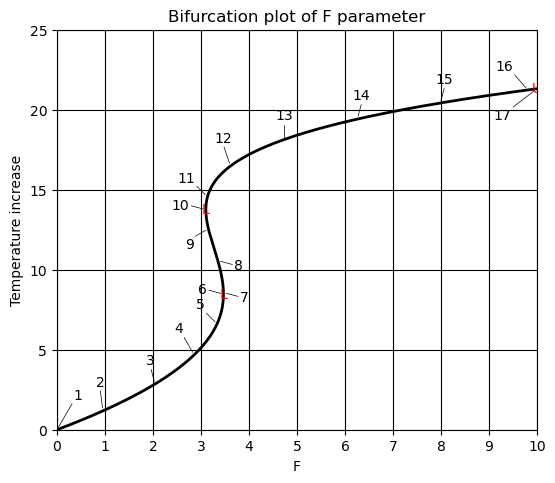

In [26]:
# plotting the bifurcation plot
auto.plot(r1)
plt.title("Bifurcation plot of F parameter")
plt.ylabel('Temperature increase')

In [27]:
# cleaning the folder of the results
auto.clean()

Deleting fort.* *.o *.exe *.*~ ... done
